In [17]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16()
model.summary()

#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='vgg_model.png')

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<PIL.Image.Image image mode=RGB size=224x224 at 0x22D4560F730>


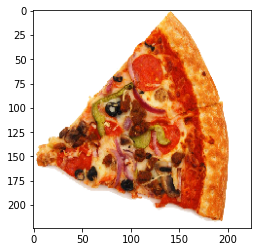

In [60]:
import matplotlib.pyplot as plt

# load the image and resize it to 224 x 224 pixels:
filePath = 'pizza.png'
#filePath = 'cat.jpg'
img = image.load_img(filePath, target_size = (224, 224))
print(img)
plt.imshow(img)
plt.show()

In [61]:
# convert image into a multi-dimensional array (rank 3 tensor):
img_array = image.img_to_array(img)
print(img_array.shape)

(224, 224, 3)


In [62]:
# reshape the array into rank 4 tensor that the model expects:
# img_array_4d = np.expand_dims(transformedImage, axis = 0)
img_array_4d = img_array.reshape(1, 224, 224, 3)
print(img_array_4d.shape)
#print(img_array_4d)

(1, 224, 224, 3)


In [77]:
img_array_4d = preprocess_input(img_array_4d)
#print(img_array_4d)
prediction = model.predict(img_array_4d)
print(prediction.shape)

(1, 1000)


In [90]:
from keras.applications.vgg16 import decode_predictions

prediction_results = decode_predictions(prediction, top = 5)
#print(prediction_results)
for i in range(5):
    prediction_label = prediction_results[0][i][1]
    prediction_confidence = prediction_results[0][i][2]
    print('%s, %f' % (prediction_label, prediction_confidence))

pizza, 0.533502
strawberry, 0.127658
orange, 0.058989
French_loaf, 0.038243
plate, 0.025600


In [87]:
# convert predictions_results array into a dictionary:
predictions = { 
    prediction_results[0][i][1]: float(prediction_results[0][i][2])*100 \
        for i in range(5) 
}
print(predictions)

{'pizza': 53.35022211074829, 'strawberry': 12.76576817035675, 'orange': 5.8988891541957855, 'French_loaf': 3.8242556154727936, 'plate': 2.5599753484129906}


In [92]:
# print top 5 predictions and confidence scores as percentages: 
for key, value in predictions.items():
    prediction_label = key
    prediction_confidence = value
    print('%s: %.2f%%' % (prediction_label, prediction_confidence))

pizza: 53.35%
strawberry: 12.77%
orange: 5.90%
French_loaf: 3.82%
plate: 2.56%
